<a href="https://www.kaggle.com/code/khangluu4903/california-housing-prices-prediction?scriptVersionId=164302720" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import linear_model
import statsmodels.api as sm
data = pd.read_csv('/kaggle/input/california-housing-prices-data-extra-features/California_Houses.csv')

## Introduction
This project aims to build a multiple linear regression model to predict housing price in California based on variables from the California Housing Data set, which obtained information from the 1990 California Census. The variables in the data set are as follows:
1. Median House Value: Median house value for households within a block (measured in US Dollars
2. Median Income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
3. Median Age: Median age of a house within a block; a lower number is a newer building
4. Total Rooms: Total number of rooms within a block
5. Total Bedrooms: Total number of bedrooms within a block
6. Population: Total number of people residing within a block
7. Households: Total number of households, a group of people residing within a home unit, for a block
8. Latitude: A measure of how far north a house is; a higher value is farther north
9. Longitude: A measure of how far west a house is; a higher value is farther west
10. Distance to coast: Distance to the nearest coast point
11. Distance to Los Angeles: Distance to the centre of Los Angeles
12. Distance to San Diego: Distance to the centre of San Diego
13. Distance to San Jose: Distance to the centre of San Jose
14. Distance to San Francisco: Distance to the centre of San Francisco

The null hypothesis for my Multiple Linear Regression model is H0: β1 = β2 = … = βp = 0 where the coefficients of the independent variables are equal to zero, indicating that the independent variables do not have a significant effect on the dependent variable.

The alternative hypothesis for my model is: βi != 0 (for some i). This means the coefficients of the independent variables are not equal to zero, indicating that at least one independent variable has a significant effect on the dependent variable.

# Data Exploration

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

<Axes: >

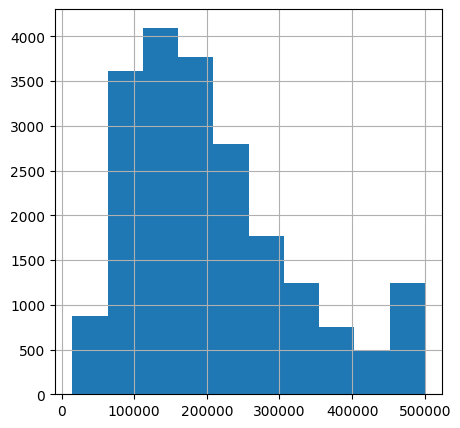

In [3]:
data["Median_House_Value"].hist(figsize = (5,5))

<Axes: >

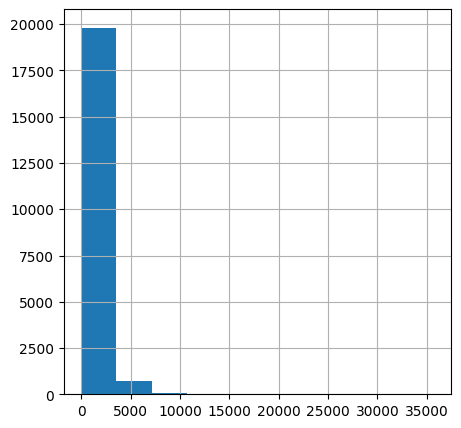

In [4]:
data["Population"].hist(figsize = (5,5))

<Axes: >

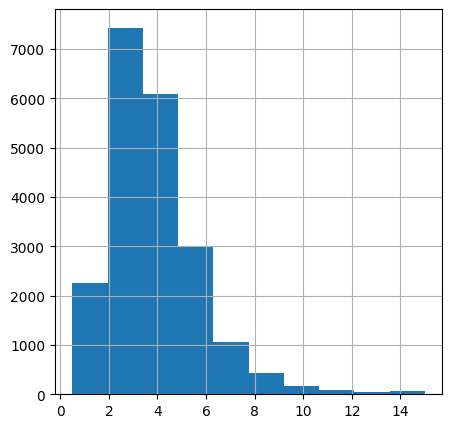

In [5]:
data["Median_Income"].hist(figsize = (5,5))

<Axes: >

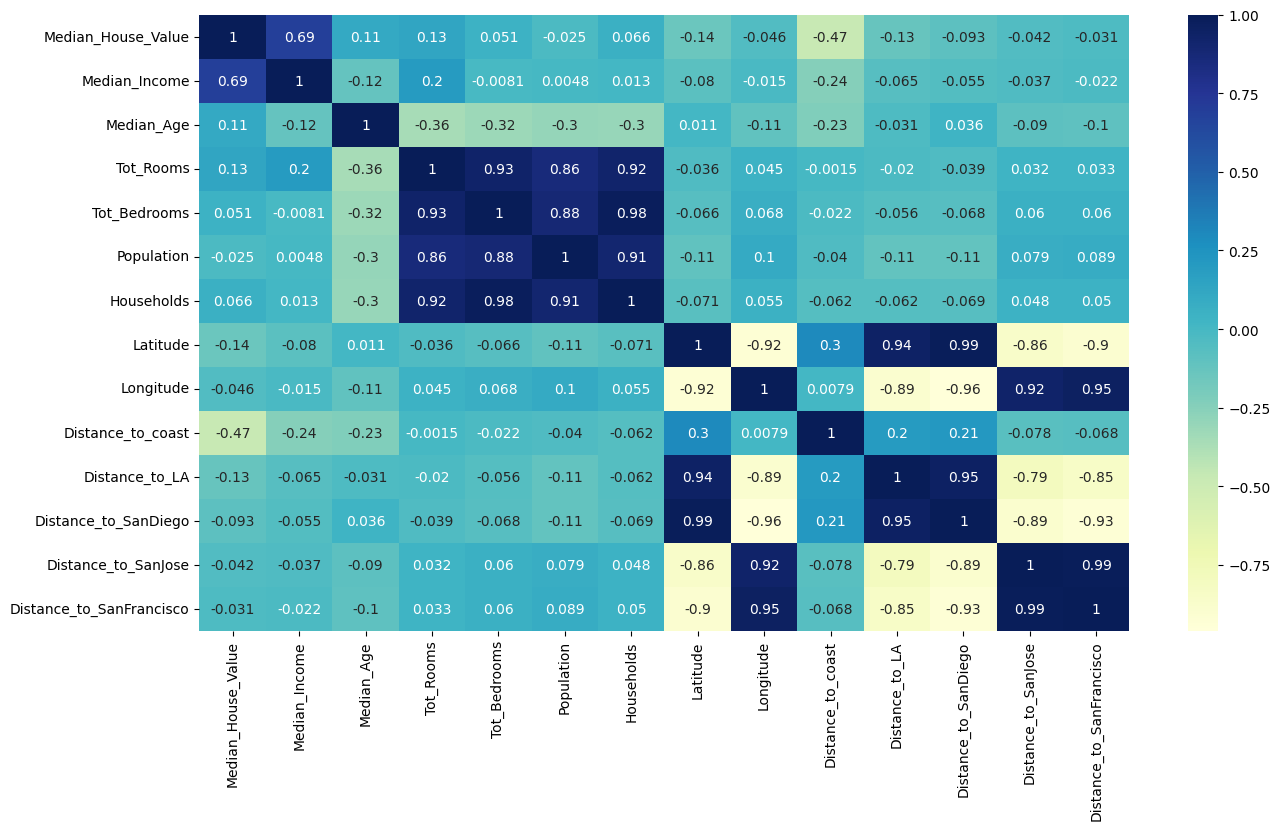

In [6]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")

Looking at the first column concerning correlation to median house value, median income, household size, and total bedrooms have the highest correlation to price.

<Axes: xlabel='Latitude', ylabel='Longitude'>

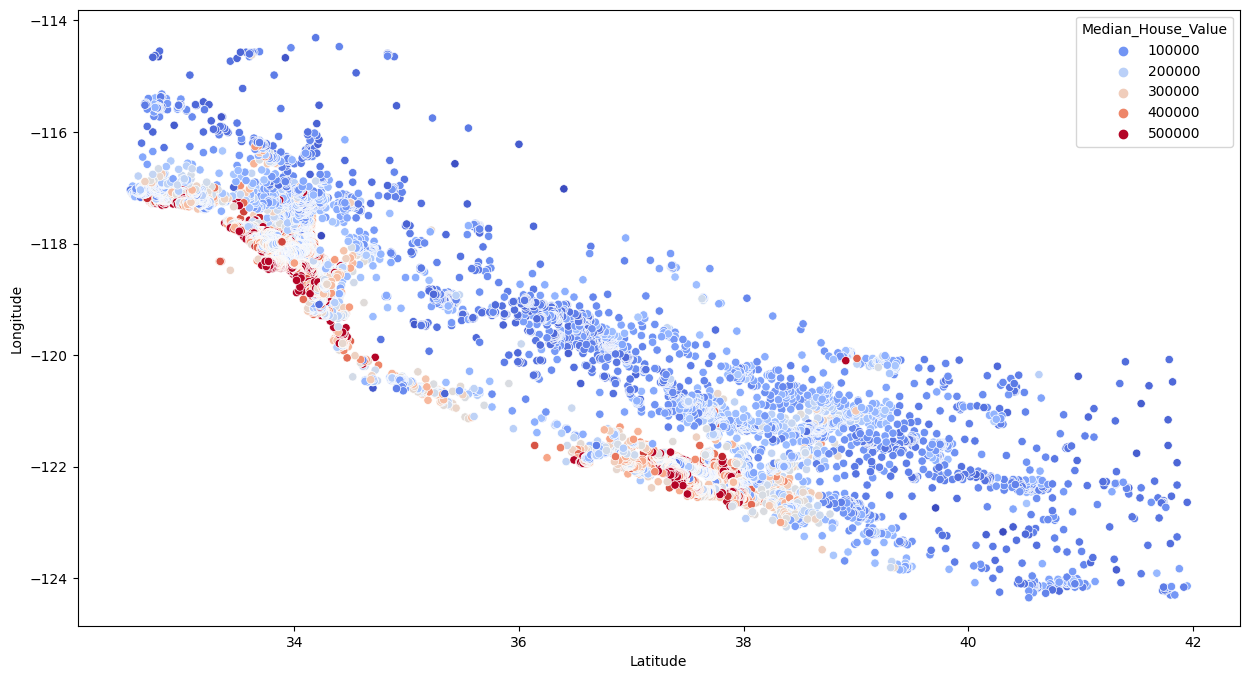

In [7]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "Latitude", y = "Longitude", data = data, hue = "Median_House_Value", palette = "coolwarm")

Houses that are closer to the ocean and the coast are more expensive.

# Data Transformation

Many variables like Tot_Bedrooms and Population are right-skewed. I will apply logarithmic data transformation to variables I want to use later to produce a normal bell curve for linear regresssion later.

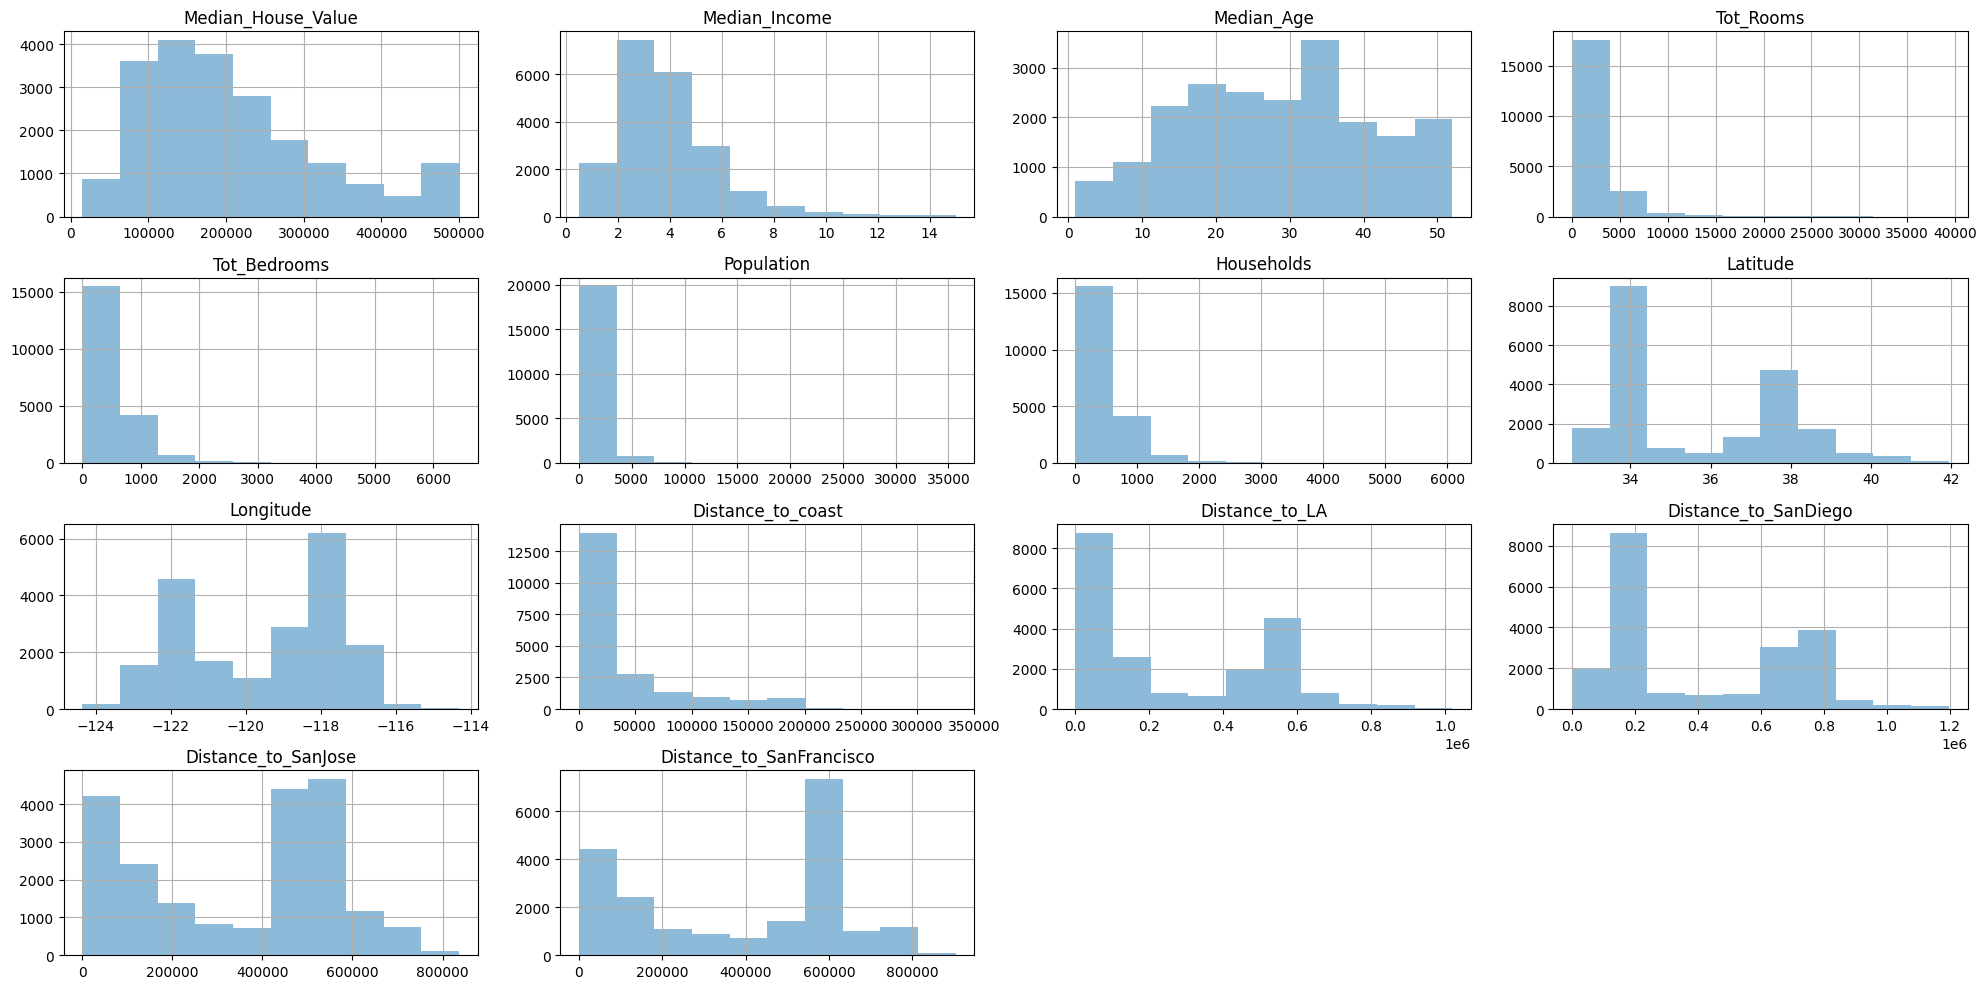

In [8]:
data.hist(alpha=0.5, figsize=(20, 10))
plt.tight_layout()
plt.show()

In [9]:
data["Tot_Rooms"] = np.log(data["Tot_Rooms"] + 1)
data["Tot_Bedrooms"] = np.log(data["Tot_Bedrooms"] + 1)
data["Population"] = np.log(data["Population"] + 1)
data["Households"] = np.log(data["Households"] + 1)
data["Distance_to_coast"] = np.log(data["Distance_to_coast"] + 1)

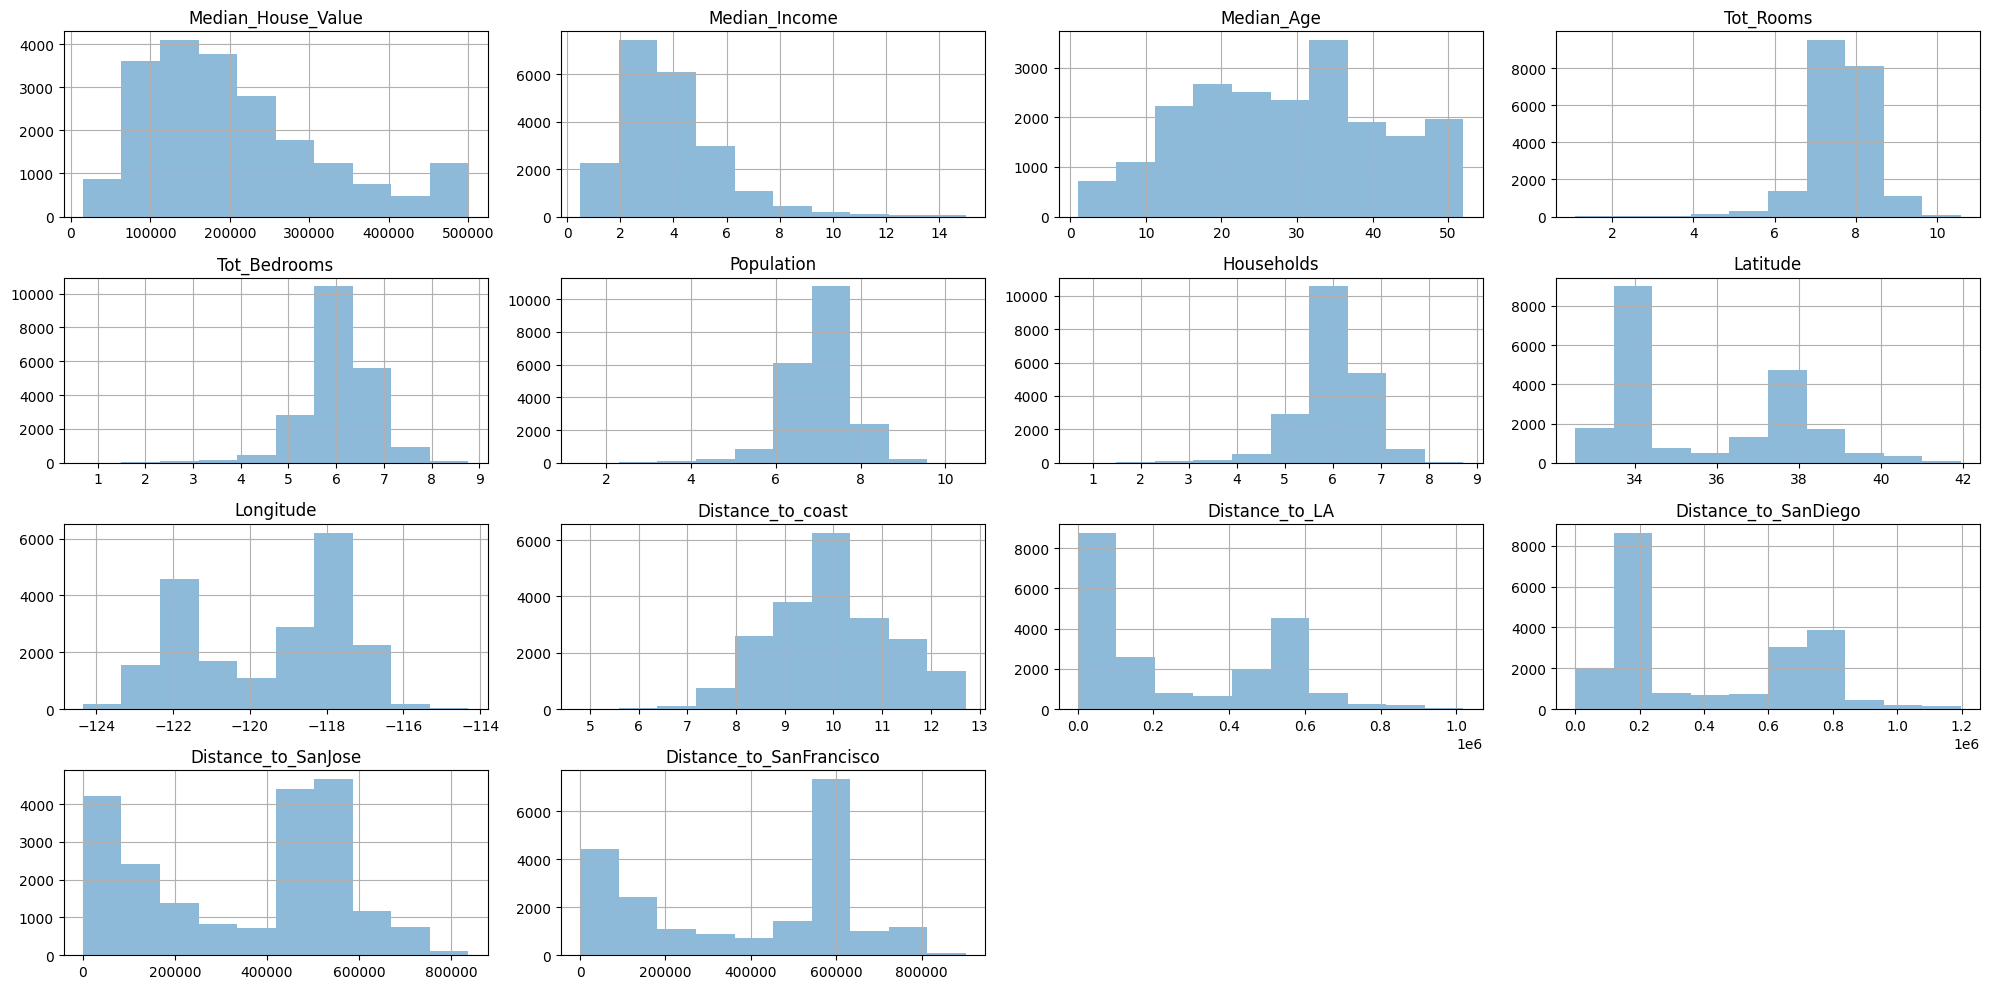

In [10]:
# checking for bell-curve distributions
data.hist(alpha=0.5, figsize=(20, 10))
plt.tight_layout()
plt.show()

# Multiple Linear Regression Model

In [11]:
# Before running any models, I will split the data set into train and test sets 
from sklearn.model_selection import train_test_split
X = data.drop(["Median_House_Value"], axis = 1)
y = data["Median_House_Value"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
train_data = X_train.join(y_train)

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
model = reg.fit(X_train, y_train)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: -712676.0615794657
Coefficients: [ 4.03019221e+04  6.69151840e+02 -2.99009733e+04  7.35705954e+04
 -8.88986697e+04  5.01694220e+04 -2.74238329e+04 -1.66209611e+04
 -2.04434966e+04 -1.82529961e-01  2.23996572e-01 -4.87463943e-02
  5.57581477e-02]


The intercept value is the estimated average value of the dependent variable when all of the independent variables values are 0. This model's intercept is -557612, which does not make sense considering that it is a dollar amount. The coefficient value represents the relation of the independent variables to the dependent variable. An increase of 1 unit for the independent variable will change the value of the dependent variable by the same amount as the coefficient.

In [13]:
X = data.drop(["Median_House_Value"], axis = 1)
y = data["Median_House_Value"]
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
train_data = X_train.join(y_train)
X_train = sm.add_constant(X_train) # adding a constant
olsmod = sm.OLS(y_train, X_train).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:     Median_House_Value   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     2767.
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:02:12   Log-Likelihood:            -2.0635e+05
No. Observations:               16512   AIC:                         4.127e+05
Df Residuals:                   16498   BIC:                         4.128e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [14]:
print(olsmod.pvalues)

const                        4.648894e-02
Median_Income                0.000000e+00
Median_Age                   4.793371e-49
Tot_Rooms                    4.399299e-18
Tot_Bedrooms                 7.443811e-68
Population                   0.000000e+00
Households                   7.003523e-28
Latitude                     4.121784e-19
Longitude                    3.654505e-17
Distance_to_coast           1.890202e-140
Distance_to_LA              2.189897e-114
Distance_to_SanDiego         4.705010e-15
Distance_to_SanJose          2.672880e-02
Distance_to_SanFrancisco     2.852910e-02
dtype: float64


The t-test measures the marginal impact of the independent variables on housing price, given the presence of all the other variables. Because the p-value for all the predictor variables are below alpha 0.05, I know that they are all significant in being able to predict the dependent value.

In [15]:
print('R^2 score:', olsmod.rsquared)
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

R^2 score: 0.685538336474613
F-statistic: 2766.6357576024134
Probability of observing value at least as high as F-statistic: 0.0


An R^2 value of 0.6855 reveals that the independent variables could explain about 68.55% of the variation in housing value. Furthermore, the F-test reveals a p-value of 0.0. From these information, I can conclude that the model is significant and performs about 69% better than the baseline model. 